<a href="https://colab.research.google.com/github/merajali384022/mehraj-ali/blob/main/simple%20Linear%20Regression%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mustafaali96/weight-height")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: merajali22
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mustafaali96/weight-height


100%|██████████| 167k/167k [00:00<00:00, 300MB/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#import the data
url ="/content/weight-height/weight-height.csv"
data=pd.read_csv(url, header=None)

In [ ]:
#EXPLORATORY DATA ANALYSIS
print(data.shape)

(10001, 3)


In [ ]:
print(data.head())

        0                 1                 2
0  Gender            Height            Weight
1    Male   73.847017017515  241.893563180437
2    Male  68.7819040458903  162.310472521300
3    Male  74.1101053917849    212.7408555565
4    Male  71.7309784033377  220.042470303077


In [ ]:
print(data.tail())

            0                 1                 2
9996   Female  66.1726521477708  136.777454183235
9997   Female   67.067154649054  170.867905890713
9998   Female  63.8679922137577  128.475318784122
9999   Female  69.0342431307346  163.852461346571
10000  Female  61.9442458795172  113.649102675312


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None


In [ ]:
print(data.describe())

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


In [ ]:
x=data['Height'].values
y=data[['Weight']].values

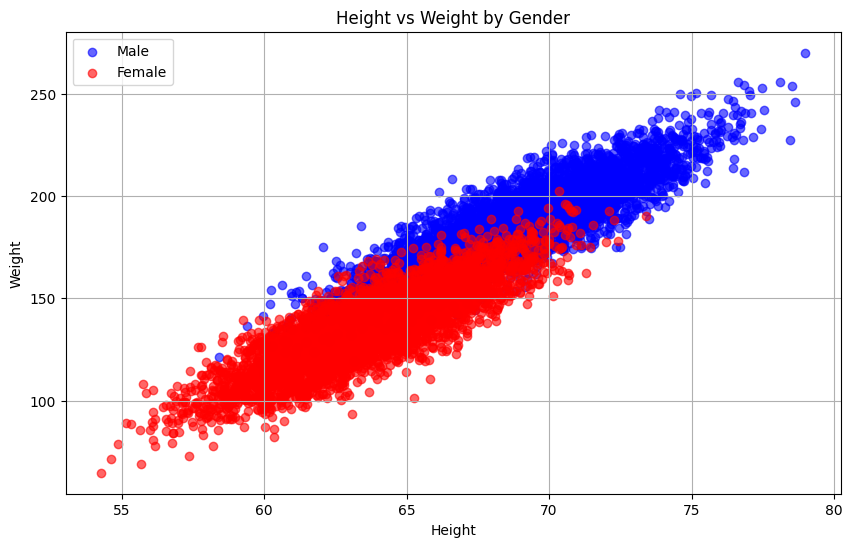

In [ ]:
# PLOT SCATTER PLOT B/W 'Height' & 'Weight' colored by 'Gender'
# Separate data by gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(male_data['Height'], male_data['Weight'], color='blue', label='Male', alpha=0.6)
plt.scatter(female_data['Height'], female_data['Weight'], color='red', label='Female', alpha=0.6)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight by Gender')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#DIMENNSIONS OF 'X' &'Y'
print(x.shape)
print(y.shape)

(10000,)
(10000, 1)


In [ ]:
# Reshape x for scikit-learn (y is already in the correct shape)
x = x.reshape(-1, 1)
# y is already in the correct shape (10000, 2) from the previous step, so no reshaping is needed for y here.

In [ ]:
# print the dimensions of x and y
print(x.shape)
print(y.shape)

(10000,)
(10000, 1)


In [ ]:
# split x and y into trainig and test data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#dimensions ofx_train,y_train,x_test,y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 1)
(2000, 1)
(8000, 1)
(2000, 1)


In [ ]:
# fit theliner model
# insrantiste the liner regression objectlm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# train the model by using training data sets
lm.fit(x_train, y_train)

#predict on the data sets
y_pred = lm.predict(x_test)


In [ ]:
# compute midel slope and intercept
a=lm.coef_
b=lm.intercept_,
print("Estimated model slope,a:",a)
print("Estimated model intercept,b:",b)

Estimated model slope,a: [[7.70218561]]
Estimated model intercept,b: (array([-349.78782058]),)


In [ ]:
#predicting the advertising values
lm.predict(x)[0:5]

array([[218.99561087],
       [179.98317065],
       [221.02196636],
       [202.69748872],
       [188.45474156]])

In [ ]:
# to make an individal preadiction using the lrm
print(str(lm.predict([[70]])))

[[189.36517177]]


In [ ]:
#calculate and print RMSE
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 12.206699151878908


In [ ]:
# calculate and print R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.8577317777038499


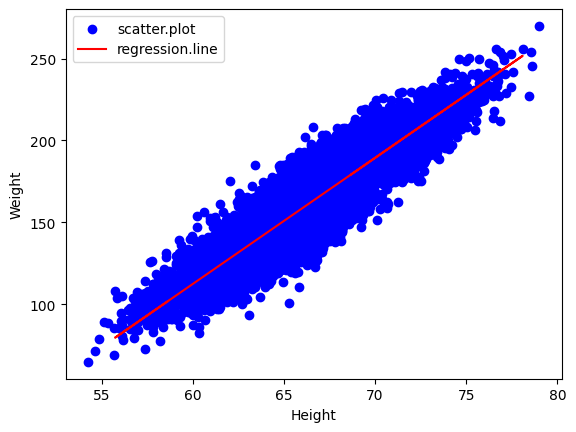

In [ ]:
# plot the regression line


plt.scatter(x,y,color='blue',label='scatter.plot')
plt.plot(x_test,y_pred,color='red',label='regression.line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

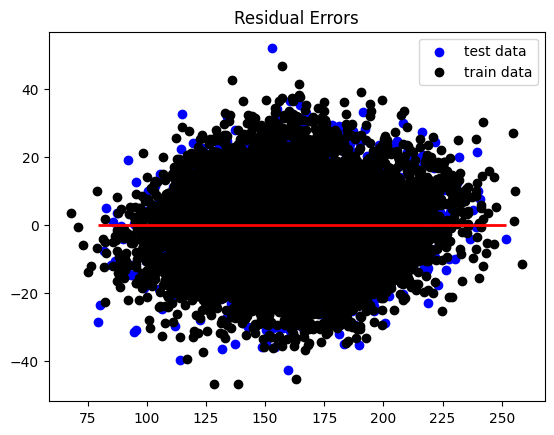

In [ ]:
#ploting the residual erors
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,color='blue',label='test data')
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,color='black',label='train data')

plt.hlines(y=0, xmin=lm.predict(x_test).min(),xmax=lm.predict(x_test).max(),linewidth=2, color='red')
plt.title('Residual Errors')

plt.legend()
plt.show()

In [ ]:
#checking for overfiting or underfitig the data
print("Trainind set score:{:4f}".format(lm.score(x_train,y_train)))
print("Test set score:{:4f}".format(lm.score(x_test,y_test)))

Trainind set score:0.854505
Test set score:0.857732


In [ ]:
#save the model for future use
import joblib
joblib.dump(lm,'weight-height-prediction.pkl')

['weight-height-prediction.pkl']